In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import os
import pingouin
import datapungibea as dpb
from matplotlib.patches import ArrowStyle
import copy
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
from pgmpy.estimators import PC
import statsmodels.api as sm
import plotly.express as px
from sklearn.linear_model import LinearRegression
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
from statsmodels.discrete.discrete_model import Logit
from networkx.drawing.nx_agraph import graphviz_layout
from collections import defaultdict
import math


C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Ple

In [2]:
from abbeyFunctions import graph_DAG, create_cluster_dags, determine_p_value, graph_DAG_cluster, get_edges_dict, get_col_shared_edges, get_row_shared_edges, plot_shared_edges, plot_shared_col_edges, plot_shared_row_edges

In [3]:
ai_data_nominal = pd.read_csv('nominal_data.csv')

In [4]:
ai_data_nominal = ai_data_nominal.set_index(['FIPS_y', 'TimePeriod'])

In [5]:
exclude_vars = ['M4 I','RM4I', 'unem']  # List of variables to exclude

# Create a dictionary to store the dataframes
ai_dct = {"logged_n": ai_data_nominal.copy(),
          "rates_n": ai_data_nominal.copy(),
         "percent rates_n": ai_data_nominal.copy()}

        
for col in ai_dct['logged_n'].columns:
    if col not in exclude_vars:
        ai_dct["logged_n"][col] = np.log(ai_data_nominal[col]).replace([np.inf, -np.inf], np.nan)


# Calculate rate of change (differences of log-transformed values)
for col in ai_dct['rates_n'].columns:
    if col not in exclude_vars:
        ai_dct["rates_n"][col] = ai_dct["logged_n"].groupby('FIPS_y')[col].diff().dropna()
                
        
        # Calculate percent rate of change
for col in ai_dct['percent rates_n'].columns:
    #if col not in exclude_vars:
        ai_dct["percent rates_n"][col] = ai_dct["rates_n"].groupby('FIPS_y')[col].diff().dropna()


C:\Users\abiodun.idowu\Anaconda3\envs\python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
diff_nominal = ai_dct['percent rates_n']

In [7]:
diff_nominal.drop(columns=['All ', 'Neig'], inplace=True)

In [8]:
diff_nominal = diff_nominal.rename(columns={'M4_y': 'M4', 'M4 I':'M4I'})

In [9]:
ai_df_diffnom = pd.read_csv('diff_nominal_kml3d.csv')

In [10]:
level_12 = ai_df_diffnom

In [11]:
dfg_ai12 = diff_nominal.dropna()

In [12]:
ai_merge12 = pd.merge(dfg_ai12, level_12[['FIPS_y', 'clusters']], on='FIPS_y', how='left')

In [13]:
kml3d_ai_level12 = ai_merge12.dropna()

In [14]:
kml3d_ai_level12 = kml3d_ai_level12.set_index(['FIPS_y'])

In [15]:
cluster_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}

In [16]:
kml3d_ai_level12['clusters'].replace(cluster_mapping, inplace=True)

In [17]:
ndr_13 = kml3d_ai_level12

In [18]:
ndr_13.columns

Index(['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem', 'clusters'], dtype='object')

In [19]:
ndr_13 = ndr_13.rename(columns={'M4_y': 'M4', 'M4 I':'M4I'})

In [20]:
ndr_14 = ndr_13.copy()

In [21]:
ndr_14.drop(columns=['M4', 'M4I'], inplace=True)

In [22]:
ndr_16 = ndr_13.copy()

In [23]:
ndr_16.drop(columns=['unem'], inplace=True)

In [24]:
plot_df5 = diff_nominal.copy()
plot_df6 = diff_nominal.copy()

In [25]:
plot_df4 = diff_nominal.dropna()
plot_df5.drop(columns=['M4', 'M4I'], inplace=True)
plot_df6.drop(columns=['unem'], inplace=True)

In [26]:
plot_df4 = plot_df4.dropna()
plot_df5 = plot_df5.dropna()
plot_df6 = plot_df6.dropna()

Working for n conditional variables: 4: 100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 27.51it/s]


('unem', 'Mini') []
keep control: Mini
('unem', 'M4I') ['Mini']
keep control: unem
('Mini', 'M4I') ['unem']
keep control: Agri
('Util', 'M4') ['Agri']
('M4', 'unem') []
keep control: Util
('Agri', 'M4') ['Util']


Working for n conditional variables: 2: 100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 55.51it/s]

keep control: Util
keep control: Agri
('Mini', 'unem') ['Util', 'Agri']
keep control: Mini
keep control: Util
('Agri', 'unem') ['Mini', 'Util']
keep control: Mini
keep control: Agri
('Util', 'unem') ['Mini', 'Agri']



Working for n conditional variables: 3: 100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 29.42it/s]


keep control: Mini
keep control: M4I
keep control: Agri
('Util', 'M4') ['Mini', 'M4I', 'Agri']
keep control: Mini
keep control: Util
keep control: M4I
('Agri', 'M4') ['Mini', 'Util', 'M4I']
keep control: Util
keep control: M4I
keep control: Agri
('Mini', 'M4') ['Util', 'M4I', 'Agri']
('Mini', 'M4I') []
keep control: Mini
keep control: Util
keep control: Agri
('M4I', 'M4') ['Mini', 'Util', 'Agri']
('M4I', 'Mini') []


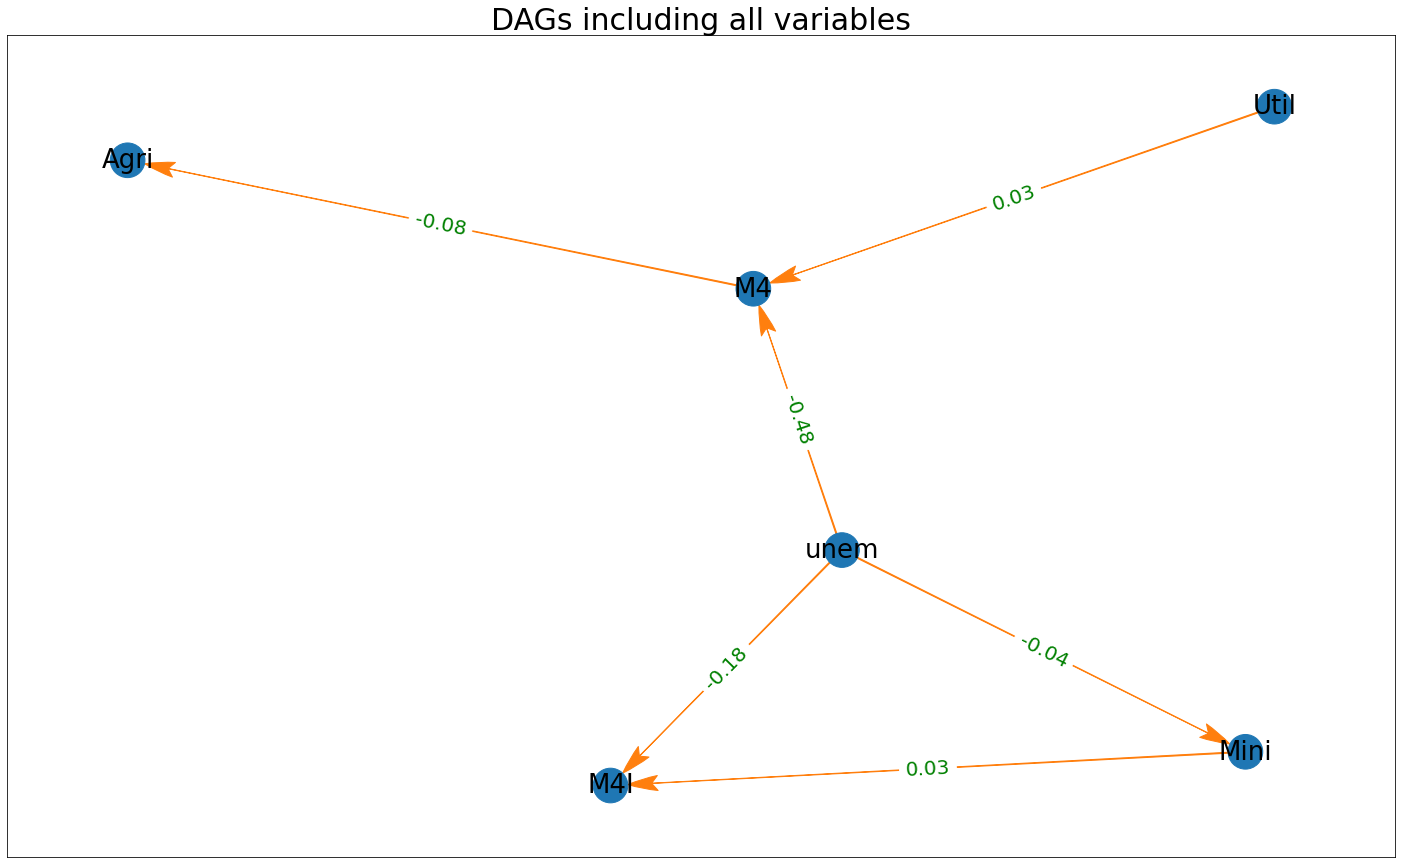

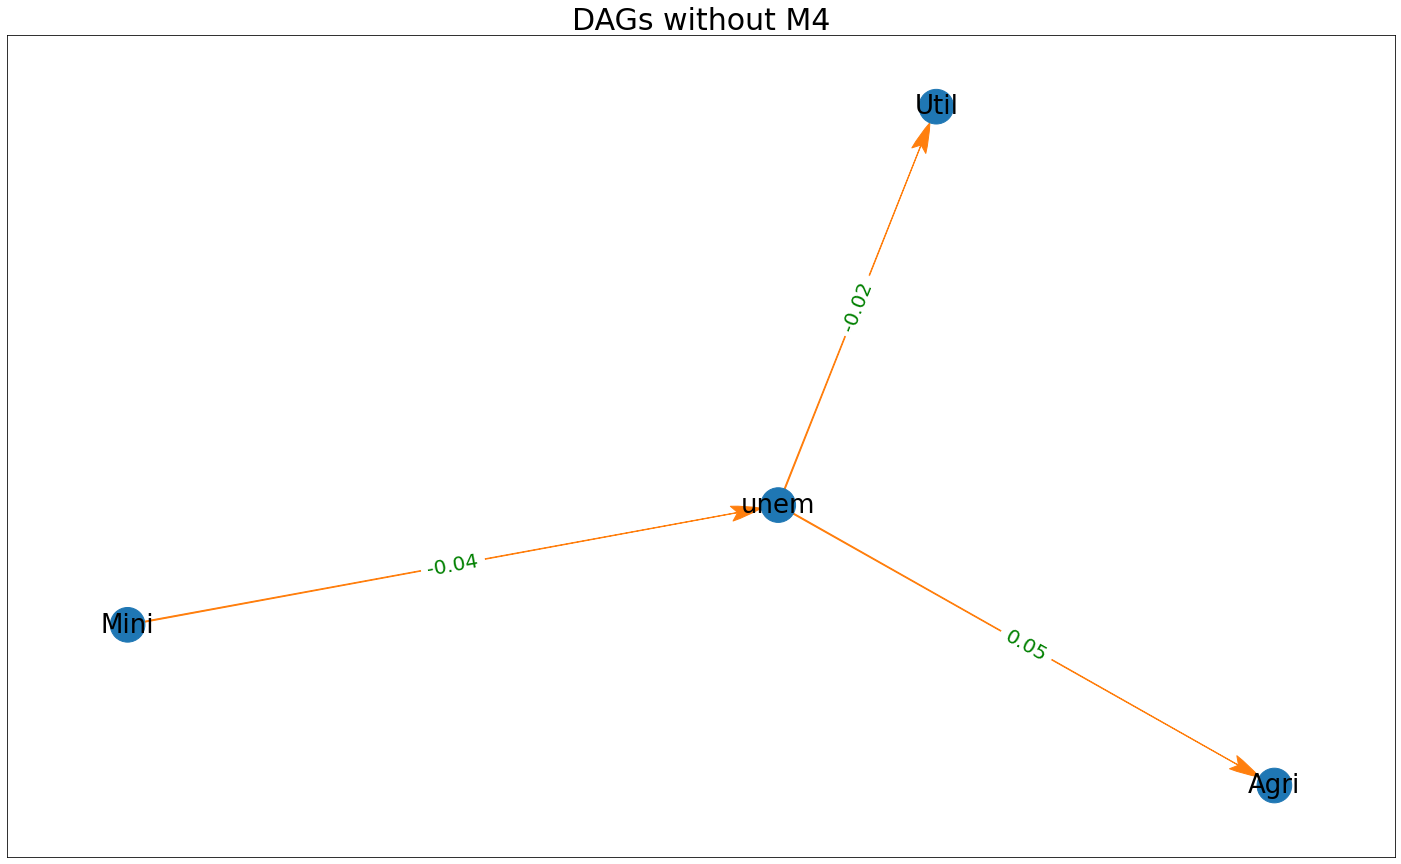

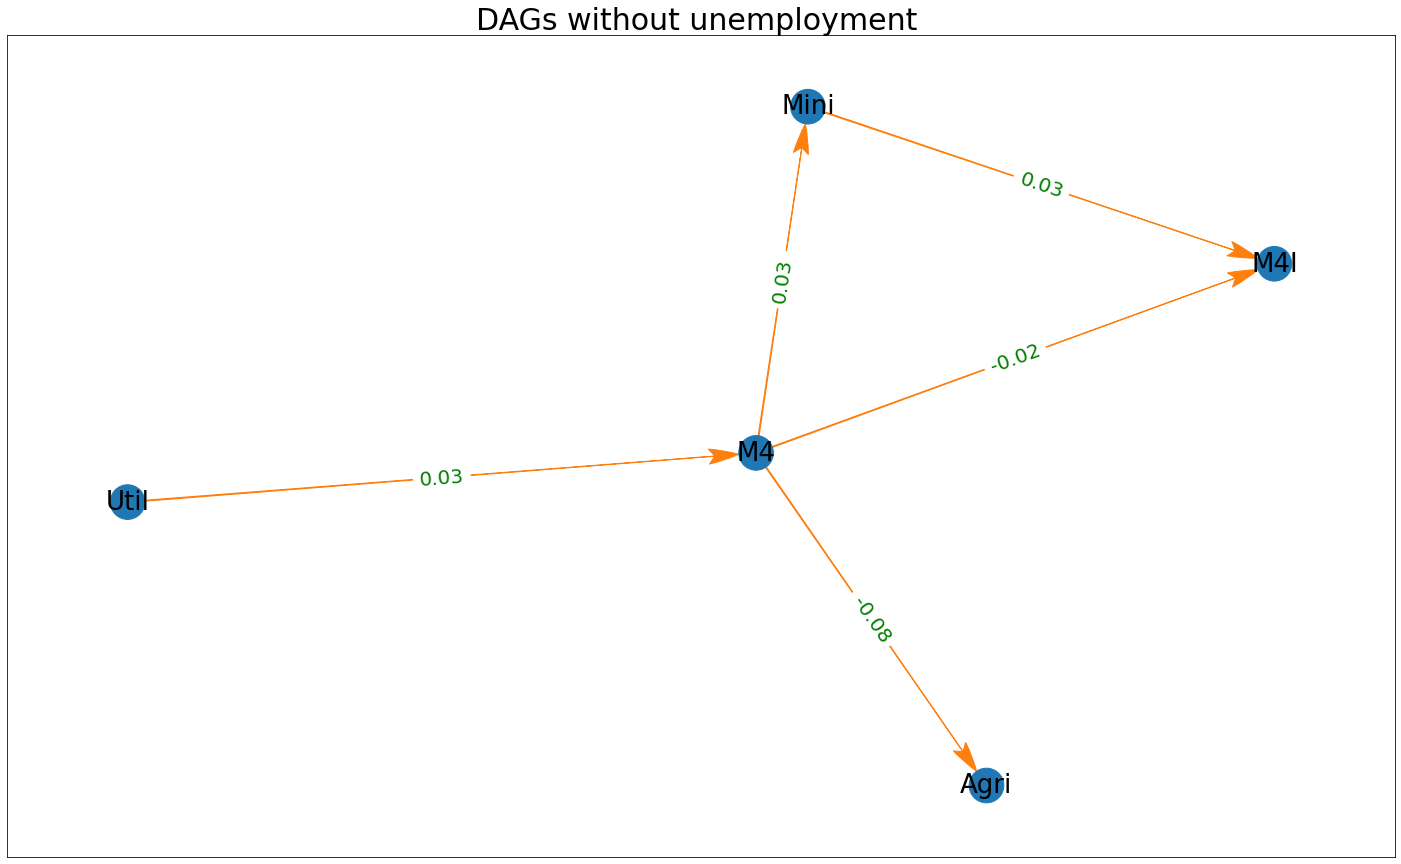

In [27]:
# Initialize a PdfPages object to save the plots in a PDF
pp = PdfPages("DAGs_nominal")

title = ['DAGs including all variables',
        'DAGs without M4',
        'DAGs without unemployment ']

# Plot DAGs for each dataframe
for i, plot_df in enumerate([plot_df4, plot_df5, plot_df6]):
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    graph_DAG(edges, plot_df, title=title[i])
    
    # Save the plot to the PDF
    pp.savefig()

# Close the PdfPages object
pp.close()


The above DAGs results indicate that the presence of the M4 variables act as an intermediary between the effectes of the production components (as can be seen in the first DAG), where M4 acts as an intermediary between the effects of utilities and agriculture. It also indicates the effect of unemployment rates acting as an intermediary as well between components, in this case, it acts as an intermediary between other components and mining.

However, when the M4 variables are excluded from the model, unemployment acts as the sole intermediary between the effects of components (the second DAG). Finally, when unmployment rates are not included in the model, but M4 included, the M4 variables act as the sole intermediary between components and their effects.

This indicates that there is about 100% consistency of the effect of the presence of M4 and Interest rates in the model. i.e, when M4 variables are included in a model, it is expected that they should act as an intermediary between effects of other sectors (or components). The same can also be said about the unemployment rates (but in the absensce of M4).

## Next we cluster the counties and create DAGs

In [28]:
# List of dataframes
dataframes = [ndr_13, ndr_14, ndr_16]

# List of p-values for each dataframe
p_values_list = [0.1, 0.05, 0.01, 0.001]  # Updated to include p-values for each dataframe

# Define names for the output files based on dataframes
output_names = [f'clusters_b{i+1}' for i in range(len(dataframes))]

Working for n conditional variables: 4:  80%|██████████████████████████████████▍        | 4/5 [00:00<00:00, 153.33it/s]


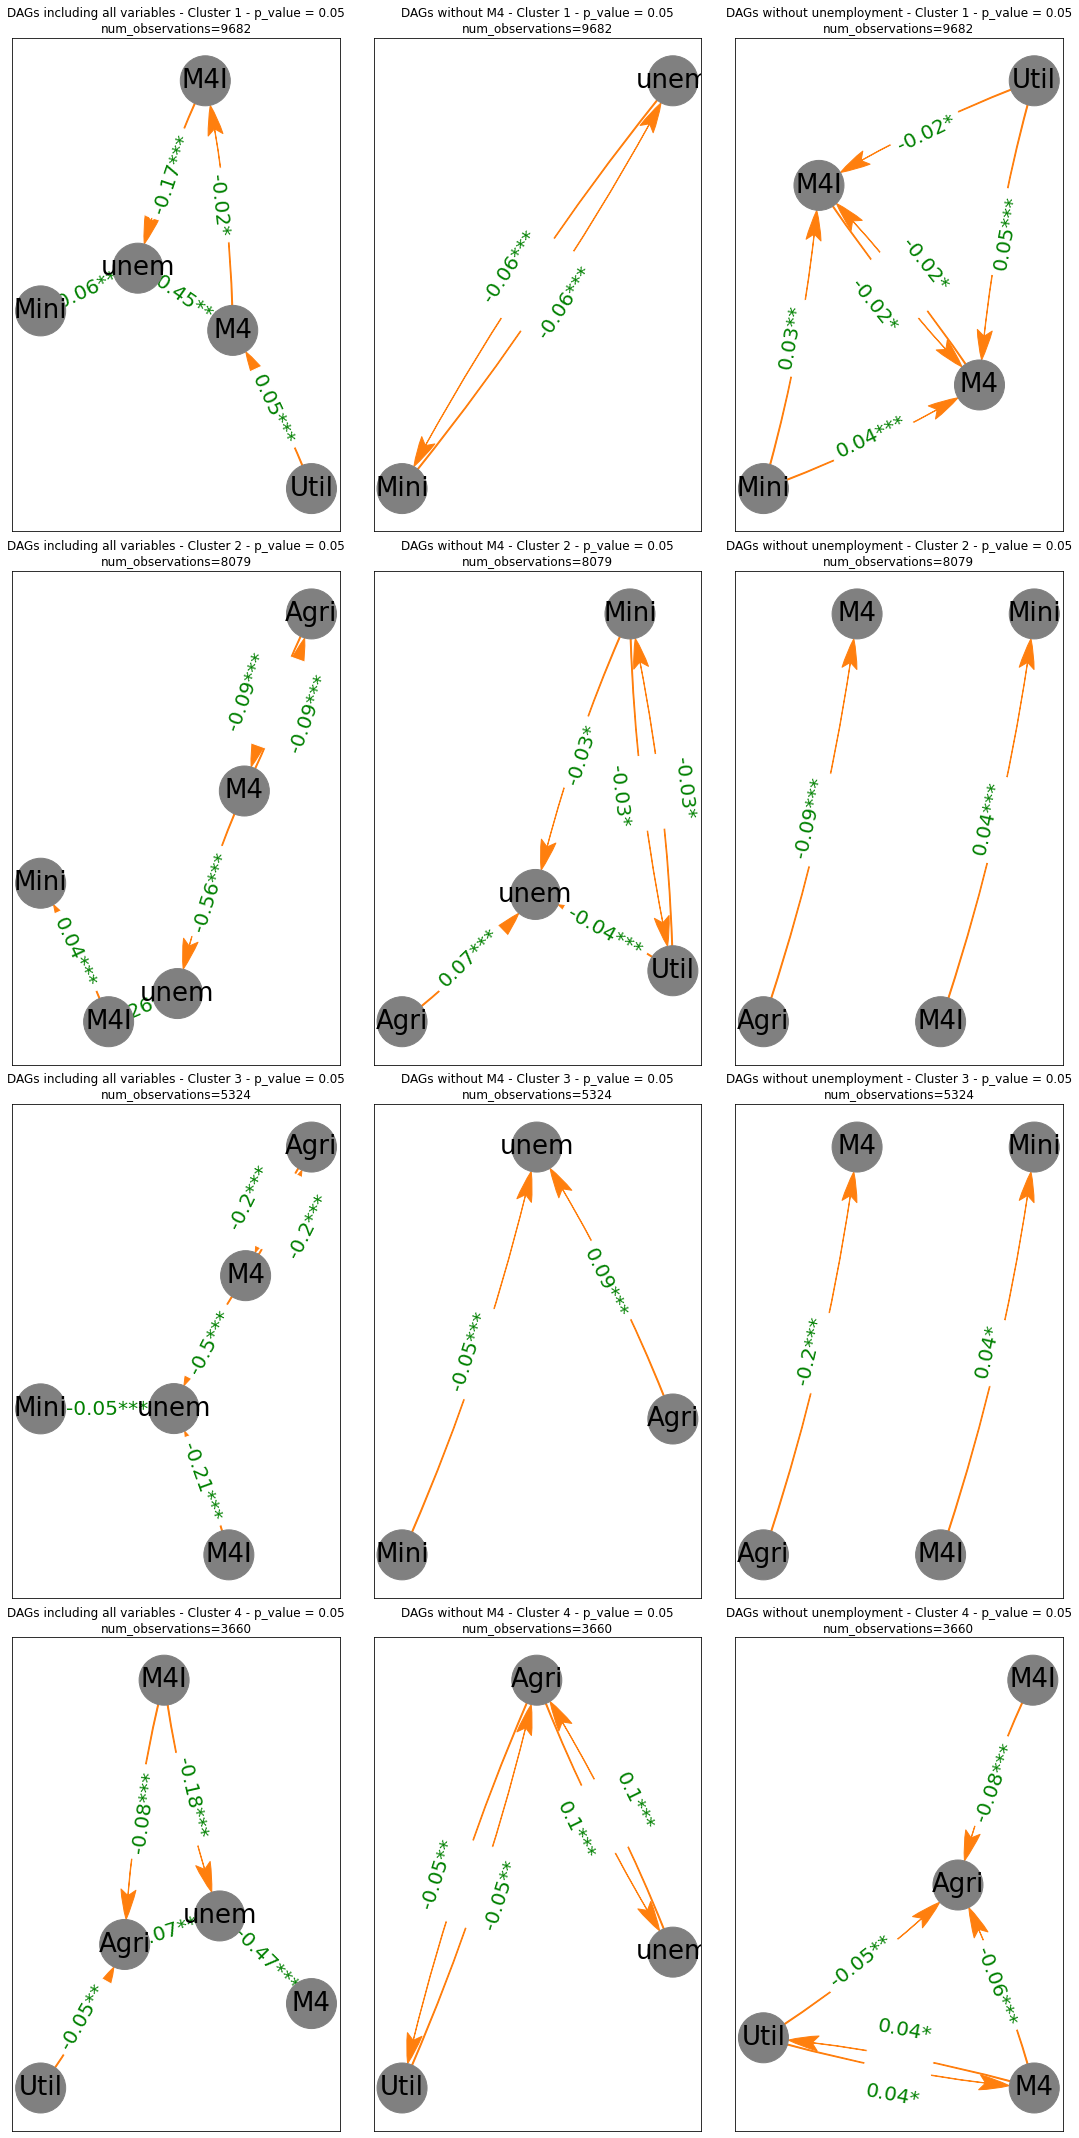

In [29]:
# Specify the absolute path for the output PDF file
pdf_file_path = f"DAGOutputs_{len(dataframes)}_dataframes.pdf"
pp = PdfPages(pdf_file_path)

# Create a grid for the subplots
fig, axes = plt.subplots(4, len(dataframes), figsize=(5*len(dataframes), 30))

# Different PC algorithms to test
algorithms = ["orig"]

dataframe_names = {
    "Dataframe 1": "DAGs including all variables",
    "Dataframe 2": "DAGs without M4",
    "Dataframe 3": "DAGs without unemployment"
}

# Iterate over each dataframe
for idx, dataframe in enumerate(dataframes):
    # Get clustered dataframes for the current dataframe
    clustered_dfs = create_cluster_dags(dataframe)

    # Iterate over clustered dataframes and determine p-values dynamically
    for cluster_idx, cluster_df in enumerate(clustered_dfs):
        n = cluster_df.shape[0]  # Number of observations for the current cluster
        p_value = determine_p_value(n)

        # Iterate over different PC algorithms
        for algorithm in algorithms:
            c = PC(cluster_df)
            model = c.estimate(return_type='pdag', variant=algorithm, significance_level=p_value, ci_test='pearsonr')
            edges = model.edges

            # Create DAG for the current cluster, p-value, and algorithm using the modified graph_DAG function
            graph_DAG_cluster(edges, cluster_df, title=f'{dataframe_names["Dataframe "+str(idx+1)]} - Cluster {cluster_idx + 1} - p_value = {p_value}\nnum_observations={n}'
                      , algorithm=algorithm, ax=axes[cluster_idx, idx], pp=pp)

# Save the figure to the PDF
pp.savefig(fig, bbox_inches='tight')

pp.close()
plt.show()

The above DAGs represent the results of clustering the counties and then generating DAGs from the clusters. The first column represent the DAGs created using all variables, the second column represent DAGs without M4 variables and the third column represent DAGs without unemployment rates.

We expect that the results should be consistent with the initial DAGs created (i.e, DAGs without clusters). The first column has a very similar set of results to the initial results. Where M4 intermediates the effects of other components. There is not a 100% consistency however.

For the second column (where the M4 variables are not included in the model), there is about 50% consistency of unemployment rates acting as an intermediary between the effects of other variables.

Finaly, the third column which represents DAGs for the model that does not include unemployment rates indicates about 25% consistency amongst the clusters.

The most consistent results according to the DAGs from the clusters compared with the original results appear to be the model where all variables are included.

In [30]:
edges_dct = get_edges_dict(dataframes)
col_shared_edges=get_col_shared_edges(edges_dct)
row_shared_edges=get_row_shared_edges(edges_dct)

Working for n conditional variables: 4:  80%|██████████████████████████████████▍        | 4/5 [00:00<00:00, 172.77it/s]


In [31]:
# def plot_shared_edges(shared_edges):
#     for key, lst in shared_edges.items():
#         fig, ax = plt.subplots(figsize=(6, 6))
#         G = nx.from_edgelist(lst)
#         color_map = ["grey" for _ in G]
#         plt.tight_layout()
#         pos = graphviz_layout(G)
#         nx.draw_networkx(G, pos, node_color=color_map, node_size=2500,
#                          font_color="black",
#                          font_size=26, alpha=1,
#                          width=1, edge_color="C1",
#                          connectionstyle='arc3, rad = 0.05',
#                          ax=ax)
#     plt.show()

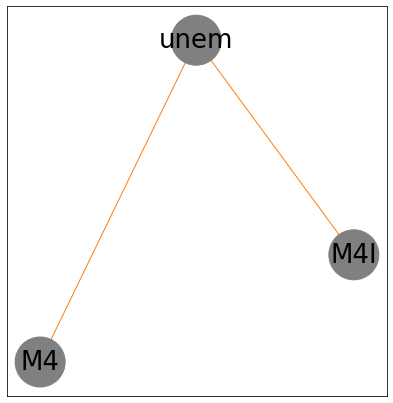

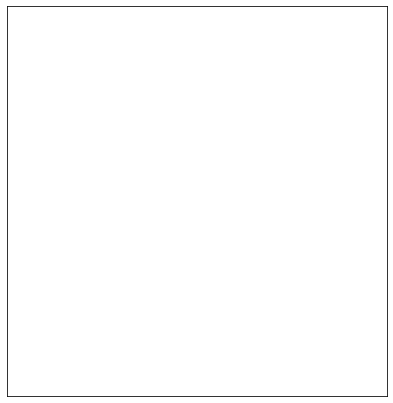

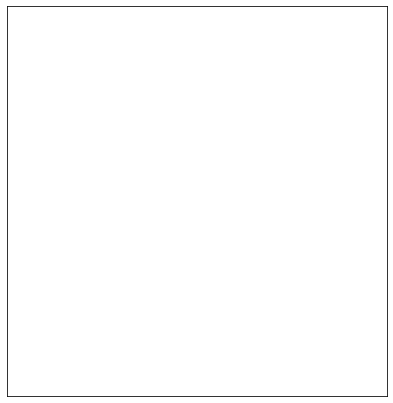

In [32]:
plot_shared_edges(col_shared_edges)

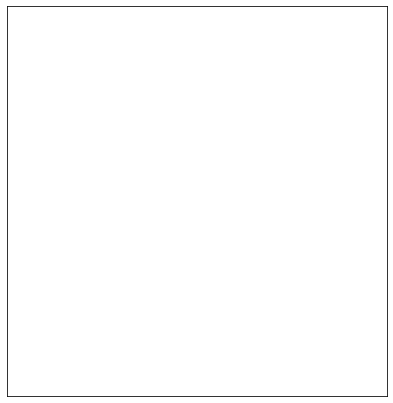

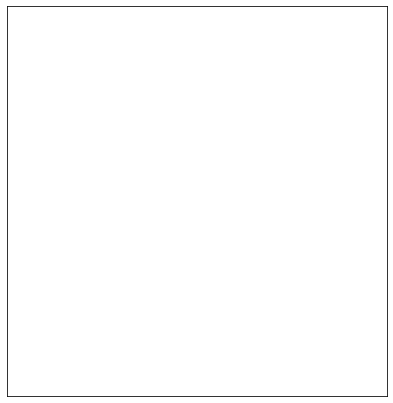

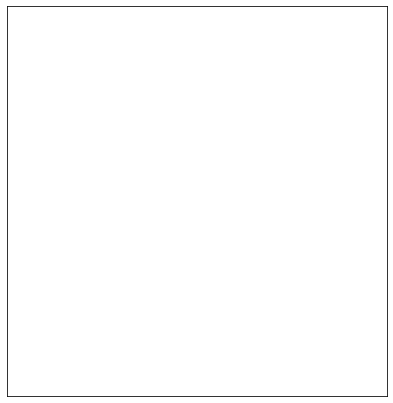

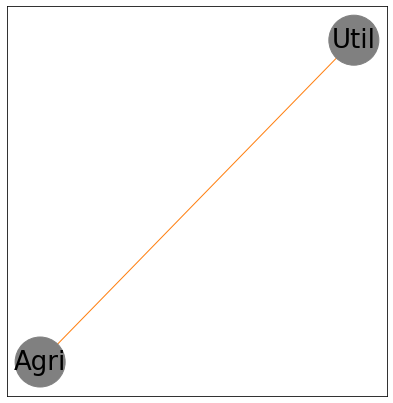

In [33]:
plot_shared_edges(row_shared_edges)